## Installing the Packages

In [1]:
!pip install openpyxl

## Preparing the Data

In [2]:
# Reading the data file

import pandas as pd

#read the file, delete an empty row, and convert 'Year' column datatype into "int" instead of "float"
pubs = pd.read_excel('Combined_Overall_Data.xlsx')
pubs = pubs.drop(index=51622)
pubs['Year'] = pubs['Year'].astype(int)

# print the first five rows of the dataframe
print(pubs.head())

   Unnamed: 0                                              Title  \
0         0.0  Multi-level Thresholding Image Segmentation Ba...   
1         1.0  The spectrum of rheumatic mitral valve regurgi...   
2         2.0  Influence of Cu-Doping on Linear and Nonlinear...   
3         3.0  Physicochemical, Electrochemical, and Theoreti...   
4         4.0  COVID-19 cough sound symptoms classification f...   

                                             Authors  Number of Authors  \
0  Houssein, E.H.| El-din Helmy, B.| Oliva, D.| E...                5.0   
1           Zwane, N.L.| Ponnusamy, S.| Naidoo, D.P.                3.0   
2   Mohammedi, A.| Ibrir, M.| Meglali, O.| Berri, S.                4.0   
3  Benamira, M.| Boughoues, Y.| Messaadia, L.| Ri...                5.0   
4                            Loey, M.| Mirjalili, S.                2.0   

                                   Scopus Author Ids  Year  \
0  43361385400| 57220022515| 55391699600| 5671125...  2021   
1              5

In [3]:
# Create a dataframe with number of publications per year per country
# Columns are sorted based on the years

results = pd.DataFrame()
keys = []
for index, row in pubs.iterrows():
    if row['Year'] not in results.columns:
        results[row['Year']] = 0
    current_pubs = row['Country/Region'].split('|')
    for key in current_pubs:
        key = key.lower()
        if key not in results.index:
            results.loc[key] = 0
            keys +=  [key]
        results.loc[key, row['Year']] = results.loc[key, row['Year']] + 1
results = results.sort_index(axis=1, ascending=False).reset_index().rename(columns={'index': 'Country'})
results

,Country,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
0,mexico,1,10,12,13,22,7,5,2,2,8,1,0
1,egypt,192,827,716,517,470,344,254,222,170,127,110,96
2,south africa,144,789,846,845,813,715,687,595,570,510,387,356
3,algeria,134,654,582,450,568,431,396,383,352,268,263,218
4,south korea,18,78,66,47,48,31,21,22,18,17,8,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,bahamas,0,1,0,0,0,0,0,0,0,0,0,0
329,lithuania,0,1,0,0,0,0,0,0,0,0,0,0
330,czech republic,0,1,0,0,0,0,0,0,0,0,0,0
331,kuwait,0,1,0,0,0,0,0,0,0,0,0,0


In [4]:
keys

['mexico',
 ' egypt',
 'south africa',
 'algeria',
 'south korea',
 ' australia',
 'united arab emirates',
 ' united states',
 'egypt',
 'belgium',
 ' united kingdom',
 ' uganda',
 'morocco',
 'united kingdom',
 ' angola',
 ' south africa',
 ' tanzania',
 ' germany',
 'france',
 ' seychelles',
 'nigeria',
 ' china',
 ' italy',
 ' france',
 'tunisia',
 ' saudi arabia',
 ' argentina',
 'united states',
 'india',
 ' turkey',
 ' kuwait',
 ' iraq',
 ' mexico',
 ' jordan',
 ' malaysia',
 ' russian federation',
 ' sudan',
 ' colombia',
 ' japan',
 ' poland',
 ' netherlands',
 ' cyprus',
 'indonesia',
 ' india',
 'uganda',
 ' morocco',
 'ethiopia',
 ' libyan arab jamahiriya',
 ' canada',
 'austria',
 ' spain',
 ' croatia',
 ' serbia',
 'japan',
 ' switzerland',
 'tanzania',
 'zambia',
 'rwanda',
 'benin',
 ' brazil',
 ' georgia',
 'ghana',
 ' sweden',
 ' lebanon',
 'germany',
 ' cameroon',
 'democratic republic congo',
 'cameroon',
 ' mauritius',
 ' ethiopia',
 'china',
 'botswana',
 'spain',


## Preparing African Countries and Regions

In [5]:
# Creating lists of African countries per region

northern_countries = ['algeria', 'egypt', 'libya', 'libyan arab jamahiriya', 'morocco', 'sudan', 'tunisia', 'western sahara']
southern_countries = ['angola', 'botswana', 'lesotho', 'mozambique', 'namibia', 'south africa', 'swaziland', 'eswatini', 'zambia', 'zimbabwe']
west_countries = ['benin', 'burkina faso', 'cape verde', 'cabo verde', "côte d'ivoire", "cote d'ivoire", 'ivory coast', 'gambia', 'ghana', 'guinea', 'guinea-bissau', 'liberia', 'mali', 'mauritania', 'niger', 'nigeria', 'senegal', 'sierra leone', 'togo', 'saint helena']
east_countries = ['burundi', 'comoros', 'djibouti', 'eritrea', 'ethiopia', 'kenya', 'madagascar', 'malawi', 'mauritius', 'réunion', 'reunion', 'rwanda', 'seychelles', 'somalia', 'somaliland', 'tanzania', 'united republic of tanzania', 'uganda', 'south sudan', 'mayotte']
central_countries = ['cameroon', 'central african republic', 'chad', 'congo', 'congo republic - brazzaville', 'congo-brazzaville', 'congo-kinshasa', 'republic of the congo', 'democratic republic congo', 'democratic republic of congo', 'democratic republic of the congo', 'equatorial guinea', 'gabon', 'são tomé & principe', 'sao tome and principe']
all_african_countries = northern_countries + southern_countries + west_countries + east_countries + central_countries

In [6]:
# Check intersection between the list of African countries and countries in our database

intersection = set(all_african_countries).intersection(keys)
non_intersection = set(all_african_countries).symmetric_difference(set(keys))
len(intersection), len(non_intersection)

(54, 298)

## Generating the Bar Chart 

In [7]:
# Generating the bar chart data by counting the number of publications per region per year

results_final = pd.DataFrame()
regions = ['northern_countries', 'southern_countries', 'west_countries', 'east_countries', 'central_countries']
for i in regions:
    results_final[i] = results[results['Country'].isin(globals()[i])].iloc[:, 1:].sum(axis=0)
results_final.to_csv('time_analysis_overall_data.csv')
results_final

,northern_countries,southern_countries,west_countries,east_countries,central_countries
2023,1070,172,171,125,25
2022,4822,870,758,517,80
2021,4613,926,750,465,74
2020,3983,926,595,345,54
2019,3490,886,540,239,32
2018,3194,783,439,227,50
2017,2875,732,356,167,34
2016,2938,648,329,137,32
2015,2256,610,231,133,19
2014,2022,543,174,92,15


In [8]:
results[results['Country'].isin(globals()[regions[0]])]

,Country,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
3,algeria,134,654,582,450,568,431,396,383,352,268,263,218
8,egypt,638,2520,2517,2132,1734,1442,1225,1298,1007,891,831,768
12,morocco,155,887,751,669,579,599,550,526,371,311,245,251
24,tunisia,139,705,722,709,581,699,686,702,507,536,335,364
123,sudan,3,25,17,10,22,20,15,24,10,9,16,8
149,libyan arab jamahiriya,1,31,24,13,6,3,3,5,9,7,7,4


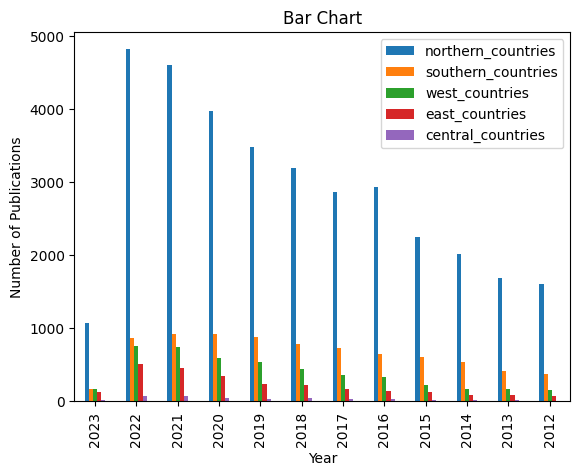

In [8]:
# Plotting the bar chart

import matplotlib.pyplot as plt

ax = results_final.plot(kind='bar')

# Add axis labels and a title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Publications')
ax.set_title('Bar Chart')

# Show the chart
plt.show()